In [48]:
import pandas as pd
from warnings import filterwarnings
filterwarnings = ("ignore")
A = pd.read_csv("C:/Users/Audi/Downloads/Cars93.csv")

In [39]:
A.head()

,id,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,1,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,...,5,177,102,68,37,26.5,11.0,2705,non-USA,Acura Integra
1,2,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,...,5,195,115,71,38,30.0,15.0,3560,non-USA,Acura Legend
2,3,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,...,5,180,102,67,37,28.0,14.0,3375,non-USA,Audi 90
3,4,Audi,100,Midsize,30.8,37.7,44.6,19,26,NaN,...,6,193,106,70,37,31.0,17.0,3405,non-USA,Audi 100
4,5,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,...,4,186,109,69,39,27.0,13.0,3640,non-USA,BMW 535i


In [49]:
from preprocessing_6PM import replacer
replacer(A)

In [50]:
Y = A[["Origin"]]
X = A.drop(labels=["id","Make","Model","Manufacturer","Origin"],axis=1)

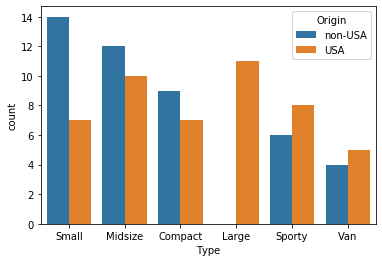

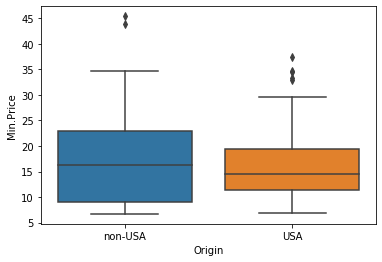

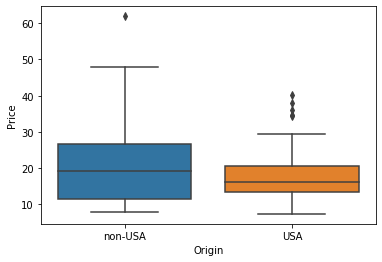

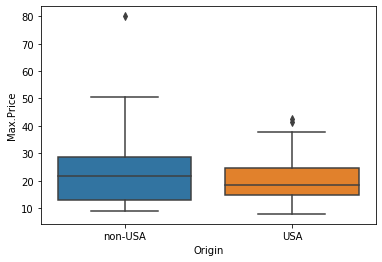

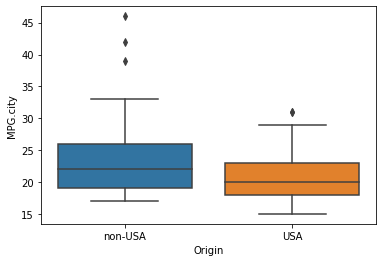

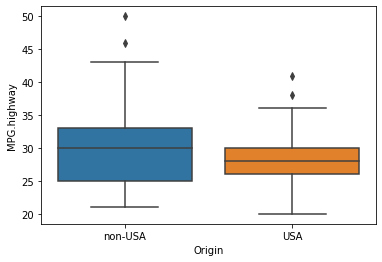

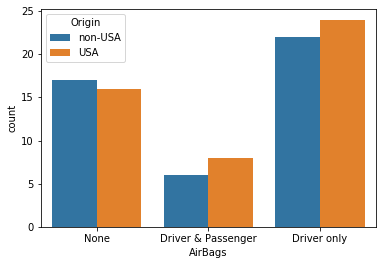

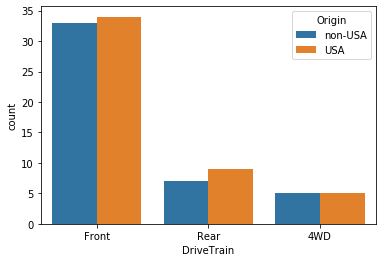

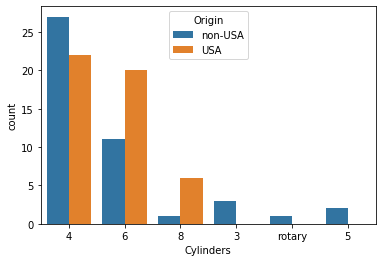

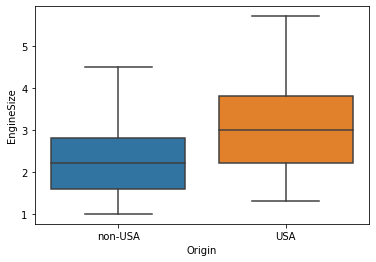

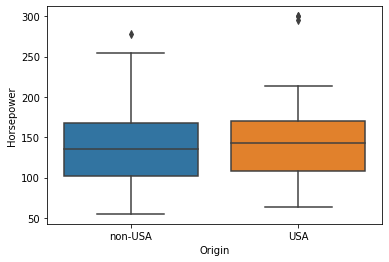

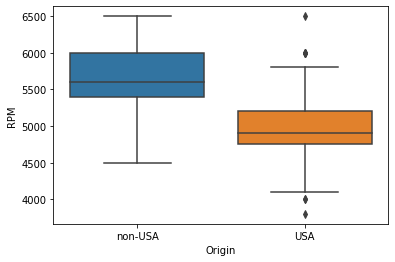

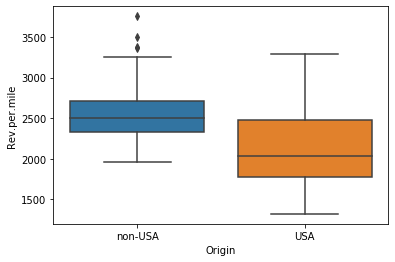

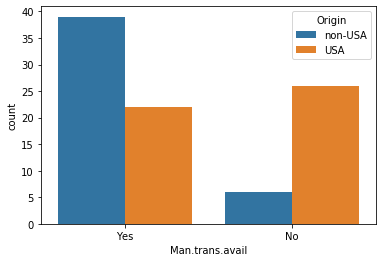

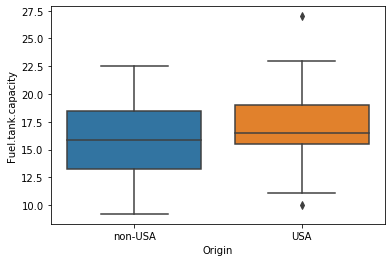

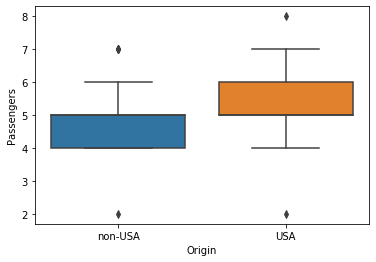

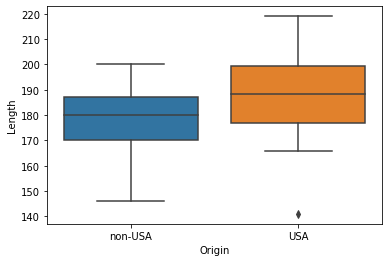

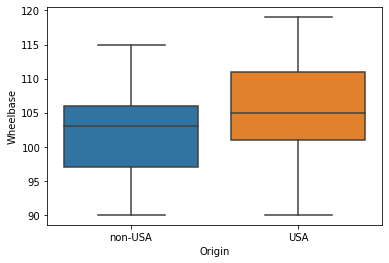

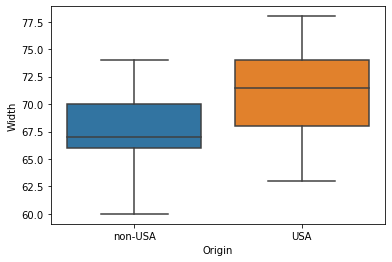

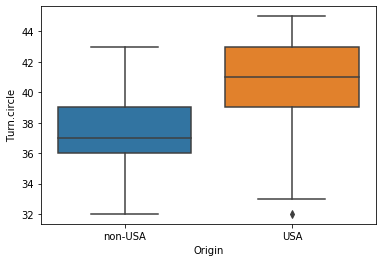

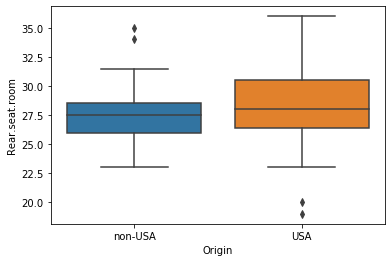

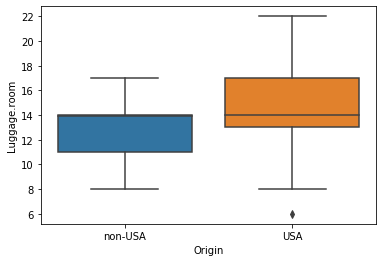

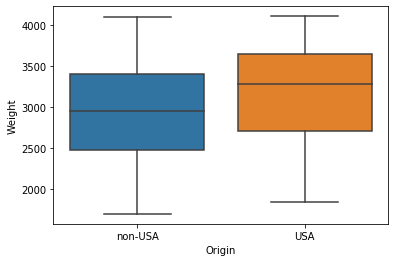

In [21]:
import matplotlib.pyplot as plt
import seaborn as sb

for i in X.columns:
    if(X[i].dtypes == "object"):
        sb.countplot(X[i],hue=Y.Origin)
        plt.show()
    else:
        sb.boxplot(Y.Origin,X[i])
        plt.show()

In [51]:
X = A[["Width"]]

In [52]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=21)

In [53]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
model = lr.fit(xtrain,ytrain)
pred = model.predict(xtest)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [54]:
pred

array(['USA', 'USA', 'USA', 'USA', 'USA', 'USA', 'USA', 'USA', 'USA',
       'USA', 'USA', 'USA', 'USA', 'USA', 'USA', 'USA', 'USA', 'USA',
       'USA'], dtype=object)

In [47]:
ytest['Predicted'] = pred

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [13]:
ytest

,Origin,Predicted
23,USA,USA
86,non-USA,USA
91,non-USA,USA
21,USA,USA
17,USA,USA
82,non-USA,USA
34,USA,USA
27,USA,USA
10,USA,USA
40,non-USA,USA


In [14]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest.Origin,pred)

0.5263157894736842

In [15]:
from sklearn.metrics import confusion_matrix
confusion_matrix(ytest.Origin,pred)

array([[10,  0],
       [ 9,  0]], dtype=int64)